In [ ]:
import requests
import pandas as pd
import sqlite3
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
# читаем файл
df = pd.read_csv("dt.csv")
# коннект к SQLite БД


# функция получения данных по вакансии
def get_vacancy_details(vacancy_id):
    url = f"https://api.hh.ru/vacancies/{vacancy_id}"
    headers = {
        'User-Agent': 'api-test-agent'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# основной цикл
for index, row in df.iterrows():
    vacancy_id = row["ID"]
    vacancy_data = get_vacancy_details(vacancy_id)
    if vacancy_data:
        description = vacancy_data.get('description')

        key_skills = vacancy_data.get('key_skills')
        if key_skills:
            skills = ', '.join([skill['name'] for skill in key_skills])
           
        else:
            skills = None
        # добавляем или обновляем запись по ID
        df.at[index, 'key_skills'] = skills
        print(f"Вакансия {vacancy_id} успешно добавлена/обновлена.")
    else:
        print(f"Не удалось получить вакансию {vacancy_id}")

    time.sleep(1)  # чтобы не словить лимит HH API

# закрываем соединение


print("Готово!")


Вакансия 121099307 успешно добавлена/обновлена.
Вакансия 121046356 успешно добавлена/обновлена.
Вакансия 121069532 успешно добавлена/обновлена.
Вакансия 121027154 успешно добавлена/обновлена.
Вакансия 121054028 успешно добавлена/обновлена.
Вакансия 120983185 успешно добавлена/обновлена.
Вакансия 121023574 успешно добавлена/обновлена.
Вакансия 120974196 успешно добавлена/обновлена.
Вакансия 120593424 успешно добавлена/обновлена.
Вакансия 117007345 успешно добавлена/обновлена.
Вакансия 121062562 успешно добавлена/обновлена.
Вакансия 120964056 успешно добавлена/обновлена.
Вакансия 120647195 успешно добавлена/обновлена.
Вакансия 120593430 успешно добавлена/обновлена.
Вакансия 121086184 успешно добавлена/обновлена.
Вакансия 120478683 успешно добавлена/обновлена.
Вакансия 121062867 успешно добавлена/обновлена.
Вакансия 120865326 успешно добавлена/обновлена.
Вакансия 120998938 успешно добавлена/обновлена.
Вакансия 120911612 успешно добавлена/обновлена.
Вакансия 120570784 успешно добавлена/обн

KeyboardInterrupt: 

In [7]:
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# читаем файл
df = pd.read_csv("dt.csv")

# функция получения key_skills по вакансии
def fetch_skills(vacancy_id):
    url = f"https://api.hh.ru/vacancies/{vacancy_id}"
    headers = {
        'User-Agent': 'api-test-agent'
    }
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            vacancy_data = response.json()
            key_skills = vacancy_data.get('key_skills')
            if key_skills:
                return vacancy_id, list(', '.join([skill['name'] for skill in key_skills]))
        return vacancy_id, None
    except Exception as e:
        print(f"Ошибка для вакансии {vacancy_id}: {e}")
        return vacancy_id, None

# создаём пустую колонку
df['Навыки'] = None

# создаём пул потоков
with ThreadPoolExecutor(max_workers=10) as executor:
    # запускаем задачи
    futures = {executor.submit(fetch_skills, vacancy_id): vacancy_id for vacancy_id in df['ID']}
    
    for future in as_completed(futures):
        vacancy_id, skills = future.result()
        # вставляем в DataFrame по индексу
        df.loc[df['ID'] == vacancy_id, 'Навыки'] = skills

# сохраняем обновлённый файл
df.to_csv("dt_with_skills_parallel.csv", index=False)
df.to_excel("dt_with_skills_parallel.xlsx", index=False)
print("Готово с потоками!")


Ошибка для вакансии 121088323: HTTPSConnectionPool(host='api.hh.ru', port=443): Read timed out. (read timeout=10)
Ошибка для вакансии 120923878: HTTPSConnectionPool(host='api.hh.ru', port=443): Read timed out. (read timeout=10)
Ошибка для вакансии 120058049: HTTPSConnectionPool(host='api.hh.ru', port=443): Read timed out. (read timeout=10)
Ошибка для вакансии 120203479: HTTPSConnectionPool(host='api.hh.ru', port=443): Read timed out. (read timeout=10)
Ошибка для вакансии 120966604: HTTPSConnectionPool(host='api.hh.ru', port=443): Read timed out. (read timeout=10)
Ошибка для вакансии 121066513: HTTPSConnectionPool(host='api.hh.ru', port=443): Read timed out. (read timeout=10)
Ошибка для вакансии 118647266: HTTPSConnectionPool(host='api.hh.ru', port=443): Read timed out. (read timeout=10)Ошибка для вакансии 118254319: HTTPSConnectionPool(host='api.hh.ru', port=443): Read timed out. (read timeout=10)

Ошибка для вакансии 120107225: HTTPSConnectionPool(host='api.hh.ru', port=443): Read tim

KeyboardInterrupt: 

In [3]:
df = pd.read_csv('dt_with_skills_parallel.csv')
df = df.fillna('нет данных')
df

,Название,Компания,Требования,Обязаности,Зарплата,Опыт работы,Ссылка,ID,Навыки
0,Директор по информационной безопасности Группы...,Finstar Financial Group,Опыт работы от 6 лет на соответствующей должно...,Общее управление ИС в распределенной группе ко...,Не указана,Более 6 лет,https://hh.ru/vacancy/121099307,121099307,нет данных
1,GR-менеджер,UserGate,Высшее образование (предпочтительно по профилю...,Работа с профильными ассоциациями. Представлен...,Не указана,От 1 года до 3 лет,https://hh.ru/vacancy/121046356,121046356,нет данных
2,Мобильный системный инженер,Союз 76,Опыт работы в аналогичной сфере приветствуется...,Обслуживание IT-оборудования на объектах заказ...,100000 - 200000 RUR,От 1 года до 3 лет,https://hh.ru/vacancy/121069532,121069532,"Настройка ПК, Администрирование сетевого обору..."
3,Специалист по видеонаблюдению и мониторинга тр...,ВСС,Высшее образование. Опыт работы в должности от...,Установка и использование систем видеонаблюден...,120000 - RUR,От 3 до 6 лет,https://hh.ru/vacancy/121027154,121027154,нет данных
4,Кадровый специалист по защите персональных данных,Управляющая компания Бамстроймеханизация,Наличие высшего образования и пройденных курсо...,Проведение анализа процессов работы с персонал...,103448 - RUR,От 1 года до 3 лет,https://hh.ru/vacancy/121054028,121054028,нет данных
...,...,...,...,...,...,...,...,...,...
1995,Специалист по системному администрированию,Краснодартеплосеть,Высшее образование. Должен знать: Основы инфор...,нет данных,101433 RUR,От 1 года до 3 лет,https://hh.ru/vacancy/120116748,120116748,нет данных
1996,Ведущий специалист отдела безопасности и антит...,Министерство промышленности и торговли Республ...,нет данных,Разработка и внедрение стратегий безопасности ...,46000 - 70000 RUR,Нет опыта,https://hh.ru/vacancy/120448360,120448360,нет данных
1997,DevOps-инженер,Staff-UP Consulting Group,Уверенный опыт с Kubernetes и Docker. Хорошие ...,Поддержка и развитие DevOps-инфраструктуры ком...,300000 RUR,От 3 до 6 лет,https://hh.ru/vacancy/120876498,120876498,нет данных
1998,Ведущий сетевой инженер,Работут,"Уверенный опыт работы с L2/L3 (STP, LACP, OSPF...",Трансляционная платформа. Плеер для размещения...,Не указана,От 3 до 6 лет,https://hh.ru/vacancy/120901259,120901259,нет данных


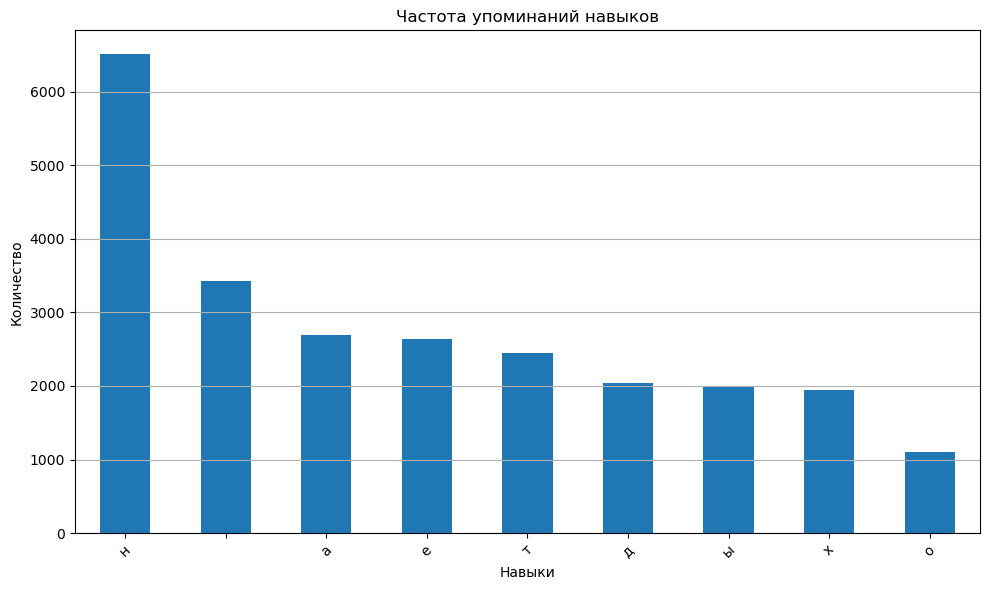

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


all_skills = [skill for skills_list in df['Навыки'] for skill in skills_list]

# Подсчитываем частоты
skill_counts = pd.Series(all_skills).value_counts()

# Строим график
plt.figure(figsize=(10, 6))
skill_counts.plot(kind='bar')
plt.title('Частота упоминаний навыков')
plt.xlabel('Навыки')
plt.ylabel('Количество')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()